In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
us_2021 = pd.read_csv("data_raw/Region_Mobility_Report_CSVs/2021_US_Region_Mobility_Report.csv")
us_2020 = pd.read_csv("data_raw/Region_Mobility_Report_CSVs/2020_US_Region_Mobility_Report.csv")


In [4]:
data = pd.concat([us_2020[us_2020["census_fips_code"]==21111],us_2021[us_2021["census_fips_code"]==21111]])

In [5]:
data[["sub_region_2","date","parks_percent_change_from_baseline"]]

,sub_region_2,date,parks_percent_change_from_baseline
272071,Jefferson County,2020-02-15,61.0
272072,Jefferson County,2020-02-16,30.0
272073,Jefferson County,2020-02-17,43.0
272074,Jefferson County,2020-02-18,-8.0
272075,Jefferson County,2020-02-19,21.0
...,...,...,...
271763,Jefferson County,2021-11-02,16.0
271764,Jefferson County,2021-11-03,8.0
271765,Jefferson County,2021-11-04,11.0
271766,Jefferson County,2021-11-05,22.0


In [6]:
alt.Chart(data).mark_point().encode(
    x = "date:T",
    y = "transit_stations_percent_change_from_baseline"
)

alt.Chart(...)

Is the park activity after the removal of the mask mandate different from before?

1) Let "regular" parK activity be defined as the distribution of activity 2 months before the mandate

2) remove sat sunday activity?

3) Look at how extreme the park activity is after the mask mandate was removed


In [8]:
data["date"] = pd.to_datetime(data["date"])

In [9]:
data["day_of_week"] = data["date"].dt.dayofweek

In [10]:
alt.Chart(data[(data["date"]>"2021-05-01") & (data["date"]<"2021-07-11") ]).mark_bar().encode(
    alt.X("parks_percent_change_from_baseline:Q", bin=alt.Bin(extent=[-50, 250], step=20)),
    y = "count()",
    color = "day_of_week:N"
)

alt.Chart(...)

In [11]:
alt.Chart(data[(data["date"]>"2021-07-11") & (data["date"]<"2021-08-01") ]).mark_bar().encode(
    alt.X("parks_percent_change_from_baseline:Q", bin=alt.Bin(extent=[-50, 250], step=20)),
    y = "count()",
    color = "day_of_week:N"
)

alt.Chart(...)

In [12]:
alt.Chart(data[(data["date"]>"2021-05-01") & (data["date"]<"2021-07-10") ]).mark_boxplot().encode(
    x = "day_of_week:N",
    y = "parks_percent_change_from_baseline"
)

alt.Chart(...)

In [13]:
alt.Chart(data[(data["date"]>"2021-07-09") & (data["date"]<"2021-07-23") ]).mark_boxplot().encode(
    x = "day_of_week:N",
    y = "parks_percent_change_from_baseline"
)

alt.Chart(...)

In [14]:
population = []

for i in range(1000):
    population.append(data[(data["date"]>"2021-05-01") & (data["date"]<"2021-06-11")].sample(7,replace = True)["parks_percent_change_from_baseline"].mean())


In [15]:
data[(data["date"]>"2021-06-11") & (data["date"]<"2021-06-19")]["parks_percent_change_from_baseline"].mean()


100.57142857142857

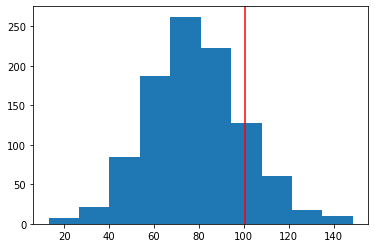

In [16]:
plt.hist(population)
plt.axvline(x=data[(data["date"]>"2021-06-11") & (data["date"]<"2021-06-19")]["parks_percent_change_from_baseline"].mean(),color ='r')

In [17]:
np.mean([i>100.57 for i in population])


0.145